In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import linalg
import statistics as st
import pandas as pd

#1#
n = 10
m = 200
p = 1/5
Z = [0]*n
Z[0] = 1
deaths = 0
rng = np.random.default_rng()
for j in range(m):
  for i in range(1,n):
    Z[i] = sum(rng.geometric(p, size=Z[i-1])) - Z[i-1]
    #print(Z[i])
    if(Z[i]==0):
      deaths+=1
      #print("Коичество поколений: ", i)
      break
  Z = [0]*n
  Z[0] = 1
#if (A == 1):
 # theor = n/(n+1)
#else:
 # theor = 1 - (A**n*(1-A))/(1-A**(n+1))
theor = min(p/(1-p), 1)


print("Фактическая вероятность вымирания за", m,"шагов:", deaths/m)
print("Теоретическая вероятность вымирания:", theor)

Фактическая вероятность вымирания за 200 шагов: 0.24
Теоретическая вероятность вымирания: 0.25


In [ ]:
#2#
n = 1000
m = 50
p = 1/2
Z = [0]*n
Z[0] = 1
deaths = 0
print("Критический случай:")
for j in range(m):
  for i in range(1,n):
    Z[i] = sum(rng.geometric(p, size=Z[i-1])) - Z[i-1]
    if(Z[i]==0):
      deaths+=1
      break
  if(Z[49]!=0):
    print("50 поколение:", Z[49], "потомков")
  Z = [0]*n
  Z[0] = 1
print("Докритический случай p = 2/3:")
p_1 = 2/3
for j in range(m):
  for i in range(1,n):
    Z[i] = sum(rng.geometric(p, size=Z[i-1])) - Z[i-1]
    if(Z[i]==0):
      deaths+=1
      break
  if(Z[49]!=0):
    print("50 поколение:", Z[49], "потомков")
  Z = [0]*n
  Z[0] = 1
print("Докритический случай p = 3/4:")
p_2 = 3/4
for j in range(m):
  for i in range(1,n):
    Z[i] = sum(rng.geometric(p, size=Z[i-1])) - Z[i-1]
    if(Z[i]==0):
      deaths+=1
      break
  if(Z[49]!=0):
    print("50 поколение:", Z[49], "потомков")
  Z = [0]*n
  Z[0] = 1

Критический случай:
50 поколение: 52 потомков
Докритический случай p = 2/3:
50 поколение: 5 потомков
50 поколение: 47 потомков
50 поколение: 63 потомков
Докритический случай p = 3/4:
50 поколение: 24 потомков


In [ ]:
#2#
n = 1000
m = 50
p = 1/2
Z = [0]*m
Z[0] = 1
alive = 0
for j in range(n):
  for i in range(1,m):
    Z[i] = sum(np.random.geometric(p, size = Z[i-1]) - 1)
    if(Z[i]==0):
      break
  if Z[49]!=0:
    print(Z)
    alive+=1
  Z = [0]*m
  Z[0] = 1
print("Выжили в критическом:", alive) #в соответствии с теоремой об асимптотике в критическом случае траектории не вымрут с вероятностью близкой к 1/m*DX, то есть с вероятностью 1/50 траектория выживет, что и видно, за 1000 генераций выживает около 50 страекторий#

p = 0.505
Z1 = [0]*m
Z1[0] = 1
alive = 0
for j in range(n):
  for i in range(1,m):
    Z1[i] = sum(np.random.geometric(p, size = Z1[i-1]) - 1)
    if(Z1[i]==0):
      break
  if Z1[49]!=0:
    print(Z1)
    alive+=1
  Z1 = [0]*m
  Z1[0] = 1
print("Выжили в докритическом (p=0.505):", alive) #потому что количество доживших порядка (EX)^50 а EX<1


#n = 100000
p = 0.55
Z1 = [0]*m
Z1[0] = 1
alive = 0
for j in range(n):
  for i in range(1,m):
    Z1[i] = sum(np.random.geometric(p, size = Z1[i-1]) - 1)
    if(Z1[i]==0):
      break
  if Z1[49]!=0:
    print(Z1)
    alive+=1
  Z1 = [0]*m
  Z1[0] = 1
print("Выжили в докритическом (p=0.55):", alive)# EX еще меньше



[1, 3, 3, 6, 6, 5, 5, 6, 9, 10, 6, 10, 21, 22, 24, 22, 23, 21, 14, 10, 14, 13, 14, 14, 14, 17, 20, 31, 23, 24, 17, 20, 26, 22, 26, 26, 22, 22, 24, 22, 18, 23, 23, 12, 17, 21, 22, 27, 31, 25]
[1, 2, 3, 7, 12, 6, 4, 8, 5, 5, 5, 11, 10, 12, 10, 10, 8, 10, 10, 12, 11, 16, 21, 24, 35, 59, 56, 60, 58, 49, 44, 32, 36, 52, 62, 53, 66, 90, 91, 80, 76, 86, 82, 69, 54, 46, 48, 51, 53, 42]
[1, 5, 12, 14, 13, 17, 14, 12, 9, 11, 11, 9, 11, 17, 27, 33, 28, 28, 29, 38, 49, 42, 35, 32, 39, 45, 37, 31, 32, 36, 31, 36, 37, 40, 29, 28, 31, 33, 27, 23, 30, 24, 26, 23, 14, 8, 13, 18, 11, 15]
[1, 1, 1, 2, 5, 8, 18, 26, 17, 24, 29, 25, 32, 47, 41, 50, 54, 42, 49, 47, 42, 55, 50, 30, 26, 28, 26, 27, 19, 12, 9, 8, 16, 11, 12, 12, 8, 7, 7, 3, 3, 4, 5, 3, 3, 6, 8, 10, 28, 32]
[1, 1, 1, 2, 2, 3, 3, 1, 1, 3, 11, 11, 7, 10, 19, 29, 28, 28, 39, 38, 40, 36, 36, 40, 45, 35, 32, 35, 33, 36, 35, 28, 29, 32, 27, 18, 26, 30, 26, 29, 33, 55, 50, 55, 48, 35, 40, 29, 26, 18]
[1, 3, 12, 5, 9, 10, 12, 17, 7, 10, 28, 24, 15, 16,

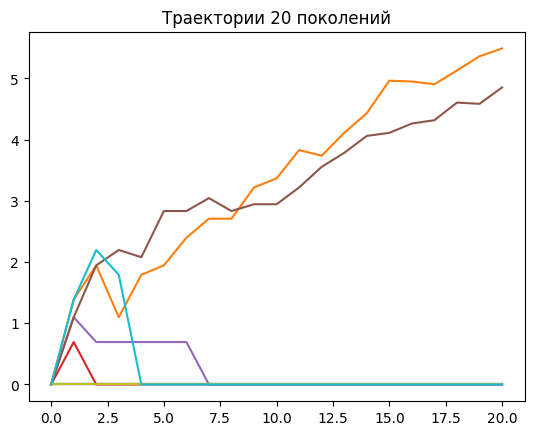

In [ ]:
#3#
p = 0.45
n = 21
Z = [0]*n
Z[0] = 1
plt.title("Траектории 20 поколений")
for j in range(10):
  for i in range(1,n):
    Z[i] = sum(rng.geometric(p, size=Z[i-1])) - Z[i-1]
    if(Z[i]==0):
      deaths+=1
      break
  ax = np.arange(0, n, 1)

  for i in range(len(Z)):
    if(Z[i]!=0):
      Z[i] = math.log(Z[i])
    else:
      Z[i]=0
  plt.plot(ax,Z)
  Z = [0]*n
  Z[0] = 1

In [ ]:
#4#
def bp_with_im(p, generations, sim, z_0=1):
  ex_count = 0
  for _ in range(sim):
    population = [z_0]
    for gen in range(generations-1):
      z = sum(np.random.geometric(p) - 1 for _ in range(population[-1]))
      population.append(z+1)
  ex_prob = ex_count/sim
  return ex_prob if sim > 1 else population

generations = 6
k = 5
sim = 1000
p = 0.6
prob = np.zeros(k)
for _ in range(sim):
  m = bp_with_im(p, generations, 1)
  if m[generations-1]<= k:
    prob[m[generations-1]-1]+=1
prob /= sum(prob)
print(prob)

[0.42745536 0.24553571 0.17075893 0.1015625  0.0546875 ]


In [ ]:
#5#
def process(n, p):
  Z = [0]*n
  Z[0] = 1
  zer = 0 #количество частиц, породивших 0 частиц
  ones = 0 #количество частиц, породивших 1 частицу
  S_0 = 0 #
  for i in range(1,n):
    S = rng.geometric(p1, size=Z[i-1])
    for k in range(len(S)):
      S[k]=S[k]-1
    S_0+=sum(S)
    for j in range(len(S)):
      if(S[j]==0):
        zer+=1
      elif(S[j]==1):
        ones+=1
    Z[i] = sum(S)
  Z.insert(0, S_0)
  Z.insert(0, zer)
  Z.insert(0, ones)
  return Z
n = 20
p1 = 0.5
Z1 = process(n, p1)
while Z1[n-1]==0:
  Z1 = process(n, p1)
print("Количество единиц, нулей и траектория процесса: ")
print(Z1)
S = 0
for i in range(3, len(Z1)):
  S += Z1[i]
p_1 = Z1[0]/S
p_2 = Z1[1]/S
EX  = Z1[2]/S
print("Численное cреднее число потомков:", EX)
print("Численная вероятность 1 частицы:", p_1)
print("Численная вероятность 0 частиц:", p_2)
#MLE
r = S - Z1[n+2]
S_1 = 2*(r-Z1[3])+Z1[n+2]+Z1[3]
p = r/S_1
print("Теоретическая оценка ОМП параметра p: ", p)
print("Теоретическое cреднее число потомков:", (1-p)/p)
print("Теоретическая вероятность 1 частицы: ", (1-p)*p)
print("Теоретическая вероятность 0 частиц: ", p)

Количество единиц, нулей и траектория процесса: 
[46, 63, 146, 1, 5, 7, 4, 10, 13, 16, 14, 12, 10, 7, 11, 16, 7, 4, 2, 2, 2, 1, 3]
Численное cреднее число потомков: 0.9931972789115646
Численная вероятность 1 частицы: 0.3129251700680272
Численная вероятность 0 частиц: 0.42857142857142855
Теоретическая оценка ОМП параметра p:  0.496551724137931
Теоретическое cреднее число потомков: 1.0138888888888888
Теоретическая вероятность 1 частицы:  0.24998810939357907
Теоретическая вероятность 0 частиц:  0.496551724137931
